# 1．データの読み込み

In [2]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず


# 2．分析

# 市区町村ごとの件数

In [15]:
df.groupby('市区町村（発生地）').size().sort_values(ascending=False)

市区町村（発生地）
船橋市        1263
市川市         872
柏市          691
松戸市         678
千葉市中央区      656
八千代市        458
習志野市        450
浦安市         435
野田市         367
千葉市稲毛区      334
千葉市美浜区      328
千葉市若葉区      313
流山市         302
千葉市花見川区     290
市原市         285
千葉市緑区       213
成田市         211
四街道市        165
木更津市        157
佐倉市         146
鎌ケ谷市        140
印西市         125
八街市         115
我孫子市        114
東金市         103
茂原市          94
君津市          84
旭市           64
白井市          63
館山市          52
富津市          45
袖ケ浦市         42
富里市          31
銚子市          30
酒々井町         30
大網白里市        26
山武市          24
香取市          22
一宮町          21
鴨川市          16
いすみ市         15
栄町           14
横芝光町         11
匝瑳市           9
長生村           9
南房総市          8
鋸南町           5
多古町           4
九十九里町         3
東庄町           3
神崎町           2
勝浦市           1
御宿町           1
睦沢町           1
白子町           1
dtype: int64

# 時間帯ごと

In [10]:
df.groupby('発生時（始期）').size().sort_values(ascending=False)

発生時（始期）
7.0     919
18.0    875
17.0    859
16.0    695
8.0     675
19.0    606
12.0    508
20.0    500
15.0    473
10.0    433
21.0    413
9.0     411
13.0    390
14.0    388
11.0    371
6.0     333
22.0    311
23.0    229
0.0     167
5.0     113
1.0      74
2.0      32
4.0      30
3.0      23
dtype: int64

# 鍵の有無

In [11]:
df.groupby('施錠関係').size()

施錠関係
施錠した    3162
施錠せず    6781
dtype: int64

# 月ごとの件数

In [12]:
df['発生日'] = pd.to_datetime(df['発生年月日（始期）'], format="%Y%m%d", errors='coerce')
df['月'] = df['発生日'].dt.month
df.groupby('月').size()

月
1.0      620
2.0      569
3.0      681
4.0      761
5.0      813
6.0      826
7.0     1027
8.0      943
9.0      984
10.0     956
11.0     888
12.0     782
dtype: int64

# 被害者の職業

In [13]:
df.groupby('被害者の職業').size().sort_values(ascending=False)

被害者の職業
その他            4968
高校生            2208
大学生            1612
中学生             886
小学生             239
法人・団体、被害者なし      30
dtype: int64

# 3．データの可視化

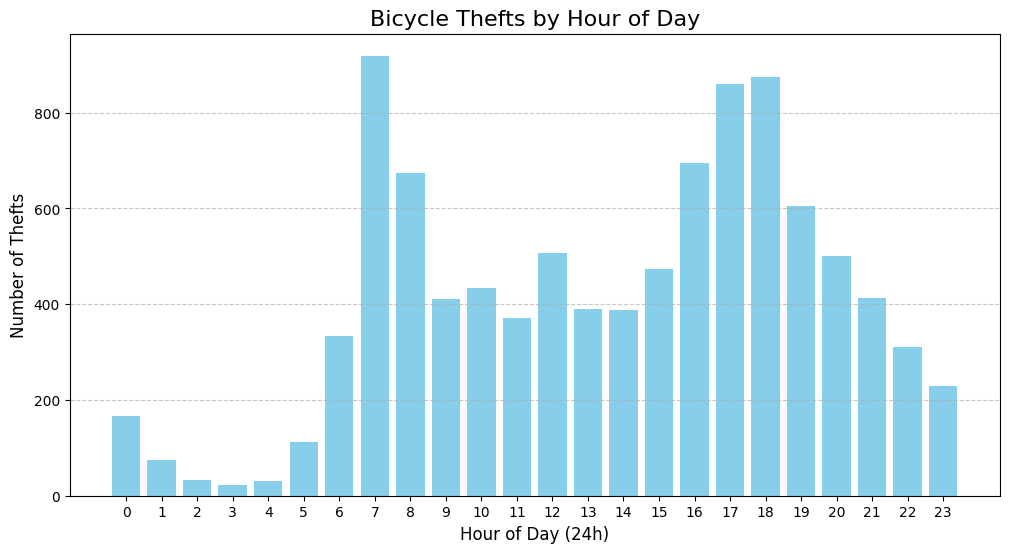

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("jitensha.csv")

df['発生時（始期）'] = pd.to_numeric(df['発生時（始期）'].astype(str).str.strip(), errors='coerce')

df_cleaned = df.dropna(subset=['発生時（始期）'])
hourly_counts = df_cleaned['発生時（始期）'].value_counts().sort_index()

hourly_counts_df = hourly_counts.reset_index()
hourly_counts_df.columns = ['Hour_Start', 'Count']
hourly_counts_df['Hour_Start'] = hourly_counts_df['Hour_Start'].astype(int)

plt.figure(figsize=(12, 6))

plt.bar(hourly_counts_df['Hour_Start'], hourly_counts_df['Count'], color='skyblue')

plt.title('Bicycle Thefts by Hour of Day', fontsize=16) 
plt.xlabel('Hour of Day (24h)', fontsize=12) 
plt.ylabel('Number of Thefts', fontsize=12) 
plt.xticks(hourly_counts_df['Hour_Start'])
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

# 4．説明

データの発生時間とその時間帯の盗難件数から棒グラフを作成しました。これを見ると、7時と17時、18時が特に多いことがよくわかりました。これから考察をすると自転車盗難は深夜などの人があまりいない時間帯ではなく、人が移動をする朝１や夕方などに多いことがわかりました。